# ML Classifications - KNN K-Nearest Neighbours

Préparez-vous à tout apprendre sur l'algorithme k-Nearest Neighbours (k-NN), un algorithme de machine learning basé sur le principe : *"Dis-moi qui est ton voisin et je te dirai qui tu es" !*

## Objectifs

- Comprendre comment utiliser l'algorithme k-NN pour la classification
- Utiliser k-NN dans scikit-learn
- Apprendre les métriques liées aux classifications

## Recommandations


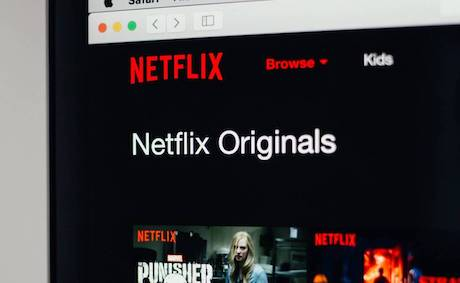

*"98% correspondent "...*

*"Les utilisateurs qui ont aimé cet article ont aussi aimé celui-ci. "...

"Vidéos recommandées pour vous "...
*
Fermez les yeux et essayez de vous souvenir de la dernière fois que vous avez écouté une chanson *complètement par hasard* ?

Les sites de commerce électronique (comme Amazon) et les plates-formes de diffusion de contenu (Netflix, Spotify, Deezer, etc...) utilisent tous ce type d'algorithmes. Tout autour de nous, le hasard est progressivement remplacé par des systèmes de recommandation qui utilisent notre historique de recherche pour suggérer de nouveaux produits.

Mais comment ces systèmes fonctionnent-ils ?

Ne vous inquiétez pas, la section suivante approfondit un peu plus ces idées !

## K-NN : Comment ça marche

L'algorithme **k-Nearest Neighbours** (abrégé en k-NN ou la méthode KNN) est un type d'algorithme de "machine learning supervisé".

En bref, l'apprentissage supervisé se produit lorsque ton dataset contient déjà une valeur cible y, alors que l'apprentissage non-supervisé n'en contient pas.



### En théorie


Source : [KNN article](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

K-NN peut être utilisé pour résoudre à la fois les problèmes de classification et de régression. Dans cette quête, nous ne parlerons que de l'aspect classification des choses. Nous aborderons l'utilisation de k-NN pour la régression dans une autre quête. Souviens-toi que dans les problèmes de classification, le but est de décider entre des options (comme Oui/Non ou Chat/Chien) alors que la régression prédit une valeur numérique réelle.

k fait référence au nombre de voisins les plus proches des données que nous essayons de classer.

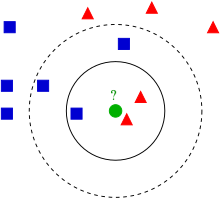

 Pour k = 1, notre modèle prédira que le "?" est :
 - Un carré bleu (classe 1)
 - Un triangle rouge (classe 2)

 Pour k = 3, notre modèle prédira que le "?" est :
 - Un carré bleu (classe 1)
 - Un triangle rouge (classe 2)

Réponses : 

pour k = 1 : Un triangle rouge

pour k = 3 : un carré bleu

**Introduction à KNN**

Pour en savoir plus sur la façon dont k-NN (et pour apprendre à faire la différence entre un chat et un chien), regarde cette vidéo (le passage le plus pertinent est du début à 9:15 min. Ensuite tu peux arrêter, la partie coding commence). Cela devrait te donner un aperçu de la façon dont cela fonctionne et de l'intérêt d'exécuter cet algorithme !

https://www.youtube.com/watch?v=4HKqjENq9OU

**Essai interactif**

Tu peux t'entrainer en déplaçant la souris sur cet écran :

https://codepen.io/gangtao/pen/PPoqMW

## Avec Python & scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [1]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

NameError: name 'X_train' is not defined

### Paramètres du modèle

**k voisins**

Tu peux changer le nombre de voisins avec le paramètre `n_neighbors`. La valeur par défaut est `5`.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors = 7)
modelKNN.fit(X_train, y_train)

**Poids**

Par défaut, chaque voisin a un poids égal ("uniforme"). Tu peux le modifier pour tenir compte de la distance. Sur l'exemple de l'image ci-dessus, dans le cas de 3 voisins, la prédiction aurait alors été "carré bleu - classe 1", car il y a un carré bleu très proche (avec plus de poids), et 2 triangles rouges lointains (avec moins de poids).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(weights="distance")
modelKNN.fit(X_train, y_train)

## Notion de distance

Traditionnellement, nous utilisons la distance euclidienne pour déterminer quels sont les plus proches voisins. C'est la distance que tu as apprise en géométrie au collège. On calcule une "diagonale" entre deux points :

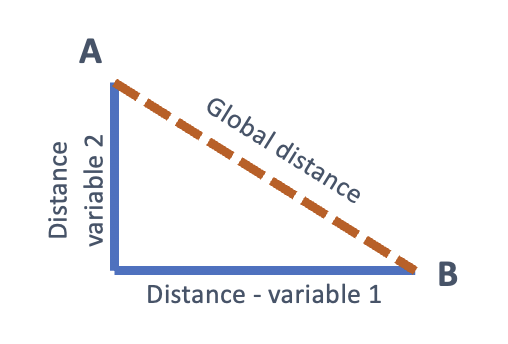

L'ordinateur peut calculer une distance sur des variables qui ne sont pas kilométriques. Par exemple, nous pouvons calculer la distance de la météo entre deux journées en comparant les écarts de température et de précipitation :

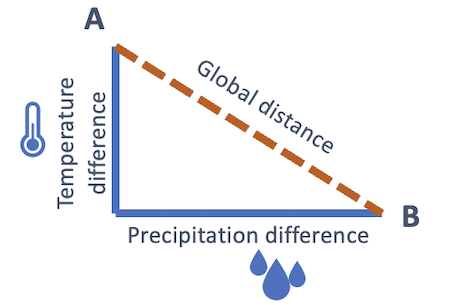

**Et surtout, l'ordinateur sait calculer des "diagonales" sur bien plus que 2 dimensions ! Nous pouvons donc lui renseigner beaucoup de variables, il trouvera les plus proches voisins.** Pour information, ces calculs multidimensionnels sont une branche des mathématiques appelés **algèbre linéaire**.



Les autres types de distance : https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa 

## Préparation des données

Parfois, les données ne sont pas comme nous le souhaiterions. Souvent, nous avons des catégories que nous aimerions utiliser comme variable (X), mais scikit-learn n'accepte que les données numériques.

Il y a deux façons de les transformer.

**Factoriser**

Dans le premier cas, nous les transformons en numérotant les catégories. Comme ceci

In [ ]:
df_animals['animaux_nb'] = df_animals['animaux'].factorize()[0]

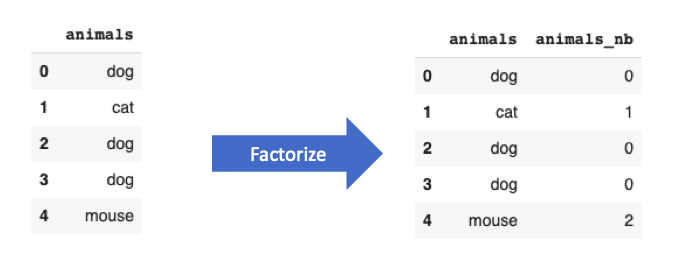

Le problème est le suivant : pour l'algorithme de machine learning, les nombres sont ordonnés. Ainsi, dans cet exemple, le chat et la souris sont proches (avec des valeurs de 1 & 2), tandis que le chien et la souris sont deux fois plus éloignés (0 & 2). Alors que ca dépend seulement de l'ordre dans lequel on les a affichés.
L'algorithme de KNN risque donc de se tromper en trouvant des voisins plus proches avec le chat qu'avec le chien...

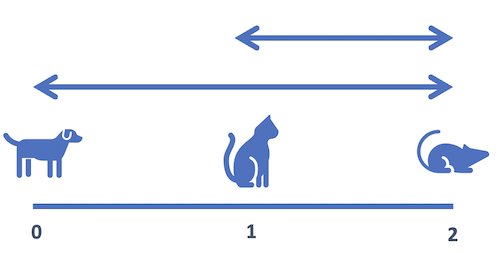

Documentation officielle : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html

**Get Dummies**

Nous préférons alors créer autant de colonnes binaires que de catégories. Le DataFrame créé est grand, mais les résultats sont meilleurs

In [ ]:
pd.concat([df_animals , df_animals['animaux'].str.get_dummies()], 
          axis = 1)

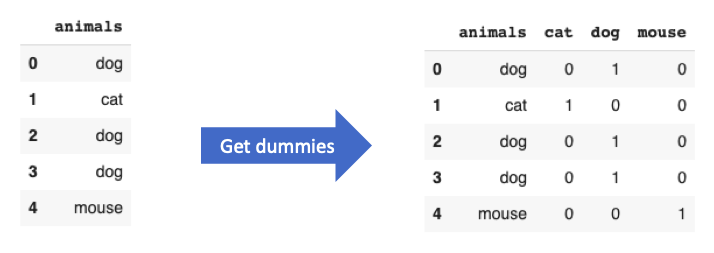

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

## Métriques

Tu as appris précédemment les régressions, et la métrique la plus connue : R2-score.

Mais elle ne peut pas s'appliquer à des algorithmes de classification.

**Matrice de confusion**

Pour les classifications, nous allons utiliser les matrices de confusions. Puis calculer un certain nombre de métriques grâce à cette matrice.
La matrice de confusion résume les prédictions du modèle. Ici, prenons l'exemple d'une classification qui distingue les chats et les chiens :

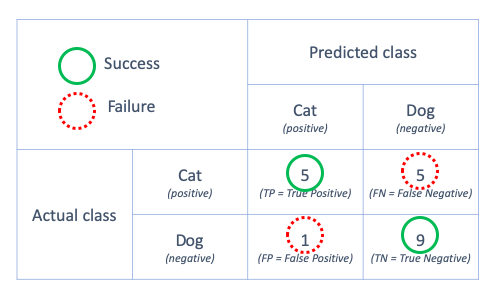

En ligne, la matrice indique les données réelles. Ici il y a 10 chats et 10 chiens dans notre dataset. Nous demandons au modèle de prédire si ce sont des chats ou des chiens. En colonne, la matrice indique ce qui a été prédit par le modèle.

> Traditionnellement, pour une classification binaire (c'est à dire avec 2 classes), les classes sont séparées entre classe positive et classe négative. Vous trouverez ce vocabulaire dans toute la littérature sur les classifications.

> Rappelons qu'une classification s'effectue sur des valeurs non ordonnées. La classe positive ou négative n'est donc pas un jugement de valeur (la classe positive peut être par exemple "malade" ou "vacciné")

Il n'existe pas de métrique unique et parfaite pour la classification. Dans notre exemple, notre modèle réussit mieux à trouver les chiens que les chats. Mais il trouve trop de chiens (il prédit que 5 chats sont des chiens). Tout dépend de votre problème.

Si vous essayez de déterminer qui est malade, est-il préférable de prédire un trop grand nombre de personnes malades (quitte à faire des coûteuses analyses supplémentaires ?). Ou de prédire un trop grand nombre de personnes en bonne santé ? (et donc de ne pas traiter certaines personnes malades à temps).

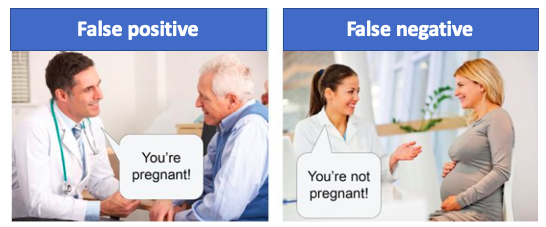

Quelques métriques :

**accuracy score** : c'est le nombre de prédictions correctes divisé par le total. Donc `(TP + TN) / total`
Le **Recall** est le rapport `TP / (TP + FN)`. Le recall est intuitivement la capacité de l'algorithme à trouver tous les échantillons positifs.

Nous pouvons calculer de nombreux indicateurs grâce à la matrice de confusion :

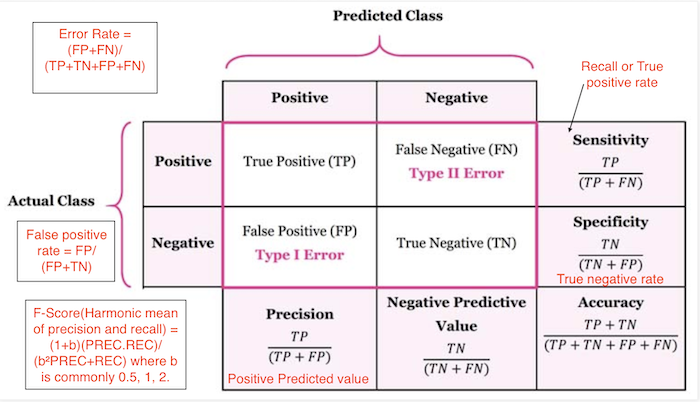

## Métriques avec scikit-learn

**Score par défaut: accuracy**

La méthode `.score()` de scikit-learn renvoie par défaut l'accuracy score.

In [ ]:
model.score(X_train, y_train)

>>> 0.72

**Matrice de confusion avec scikit-learn.
**
Mais ce n'est pas forcément une bonne métrique. Mieux vaut vérifier avec la matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = model.predict(X_test)),
             index = model.classes_ + " actual",
             columns = model.classes_ + " predicted")

**Et pour des métriques détaillées**

Recall, F1-score :

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

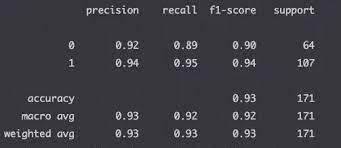

## Ressources

Explication approfondie (avec code) sur le fonctionnement de l'algorithme. Il fournit également du code Python (dans Scikit-Learn) et donne des exemples de son utilisation dans la vie réelle (par exemple dans les systèmes de recommandation).

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

# Challenge

Dans ce challenge, tu devras accomplir une série de missions pour apprendre à utiliser la classification KNN.

Le lien vers le notebook se trouve ici.